#  Corrigé :   coloration et problèmes d'optimisation.

Nous allons utilser la classe `Graphe` codée lors du TP précédent.

In [19]:
# Import de networkx pour l'affichage des graphes.
import networkx
import matplotlib.pyplot as plt

In [20]:
class Graphe:
    def __init__(self):
        self.adj = {}
        self.couleurs = {}
        
    def ajouter_sommet(self,s):
        if s not in self.adj :
            self.adj[s] = []
            
    def ajouter_arete(self, s1, s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        if s2 not in self.adj[s1]:
            self.adj[s1].append(s2)
        if s1 not in self.adj[s2]:
            self.adj[s2].append(s1)
        
    def arete(self,s1,s2):
        return s2 in self.adj[s1]
    
    def sommets(self):
        return list(self.adj.keys())
    
    def voisins(self,s):
        return list(self.adj[s])
    
    def colorer(self,s,couleur):
        """méthode qui permet de colorer le sommet s avec la couleur couleur"""
        self.couleurs[s] = couleur
    
    def __str__(self): 
        "Affichage du graphe en utilisant le module networkx"
        G = networkx.Graph()
        # sorted pour avoir la correspondance entre les couleurs choisies et celles affichées
        
        for s1 in (self.sommets()):
            for s2 in self.voisins(s1):
                G.add_edge(s1,s2)
        print(self.couleurs)
        if self.couleurs:
            networkx.draw(G, with_labels=True,cmap=plt.get_cmap('tab10'), node_color=list(self.couleurs.values()))
        else:
            networkx.draw(G, with_labels=True, node_color="skyblue" )  

        return ""

In [21]:
# Exemple Vérifiez le bon fonctionnement de la classe Graphe avec un exemple .

gr = Graphe()

gr.ajouter_arete("A","B")
gr.ajouter_arete("B","C")
gr.ajouter_arete("D","B")
gr.ajouter_arete("A","D")
gr.ajouter_arete("A","C")
gr.ajouter_arete("C","D")


print("Sommets du graphe:",gr.sommets())
print("Voisins de A:",gr.voisins("A"))
print("Voisins de B:",gr.voisins("B"))


Sommets du graphe: ['A', 'B', 'C', 'D']
Voisins de A: ['B', 'D', 'C']
Voisins de B: ['A', 'C', 'D']


## Problème d'aquarium

A, B, C, D, E, F, G et H désignent 8 espèces de poissons (Anguille, Barracuda, Carpe, Dorade, Espadon, Flétan , Guppy, Hippocampe et Ide)

- A ne peut pas vivre avec B, C, D et E.
- C ne peut pas cohabiter avec B
- B est incompatible avec D et F
- G se fait dévorer par E, H et F
- H ne peut pas vivre avec E et F

Nous allons chercher à répondre au problème suivant :
### Combien faut-il d'aquarium au minimum pour que les poissons cohabitent entre eux ?
Pour cela nous allons utiliser la notion de coloration de graphe.


<div class="alert alert-warning" role="alert">
    
## Exercice 1
Mettre la situation sous forme de graphe dans lequel :
- Chaque sommet est un des poissons.
- Deux sommets sont reliés par une arête si et seulement si les poissons sont incompatibles.    

Représenter le graphe précédent à l'aide de `Python` en utilisant la classe `Graphe` ci-dessus.
</div>

{}



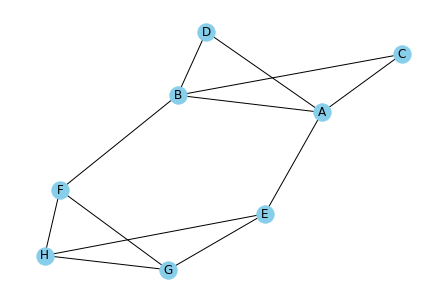

In [22]:
# Votre code ici
A=Graphe()


A.ajouter_arete("A","B")
A.ajouter_arete("A","C")
A.ajouter_arete("A","D")
A.ajouter_arete("A","E")
A.ajouter_arete("C","B")
A.ajouter_arete("B","D")
A.ajouter_arete("B","F")
A.ajouter_arete("G","E")
A.ajouter_arete("G","H")
A.ajouter_arete("G","F")
A.ajouter_arete("H","E")
A.ajouter_arete("H","F")



print(A)


<div class="alert alert-warning" role="alert">
    
## Exercice 2
On dispose d'une couleur par aquarium, colorier les sommets du graphe de façon à ce que les poissons du même aquarium soient compatibles entre eux.  
Essayez d'utiliser le moins de couleurs différentes.
   


Pour colorer un sommet, utilisez la méthode `colorer` comme dans l'exemple suivant : 
```
g.colorer("A",'red')
g.colorer("B",'DarkGreen')
# Il  faut demander l'affichage du graphe pour obtenir les sommets colorés
print(g)
```
    
 Vous pourrez des noms de couleurs que vous trouverez dans le site suivant : [https://html-color-codes.info/color-names/](https://html-color-codes.info/color-names/)

    
<details style ="background-color: Silver;">
   <summary > Cliquez ici pour un indice  </summary>
Par exemple, A et B ne peuvent pas être colorés de la même couleur car les poissons A et B sont incompatibles. Par contre A et F peuvent être colorés avec la même couleurs car les poissons A et F peuvent être mis dans le même aquarium.
</details>
</div>

{'A': 'red', 'B': 'green', 'C': 'lightblue', 'D': 'lightblue', 'E': 'lightblue', 'F': 'lightblue', 'G': 'red', 'H': 'green'}



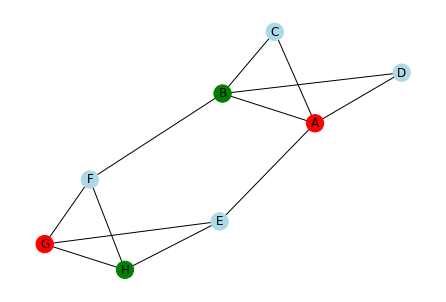

In [23]:
# Votre code ici


P.colorer("A","red")
P.colorer("B","green")
P.colorer("C","lightblue")
P.colorer("D","lightblue")
P.colorer("E","lightblue")
P.colorer("F","lightblue")
P.colorer("G","red")
P.colorer("H","green")


print(P)

<div class="alert alert-warning" role="alert">
    
## Exercice 3
D'après vous, combien faut-il d'aquariums différents au minimum ?  
**Votre réponse ici**  
3
    
Peux-t-on le faire avec moins de 3 aquariums, argumentez votre réponse .  
**Votre réponse ici**  
il existe un sous graphe complet d'ordre 3 ( =un triangle)
</div>

<div class="alert alert-warning" role="alert">
    
## Exercice 4


Écrire, en langage naturel, un algorithme qui :
- en entrée prend un graphe G et des couleurs 1,2,3,4... Les sommets de G sont numérotés de 1 à $n$ ($s_1$,$s_2$,. . .,$s_n$)
- en sortie donne une coloration valide de ce graphe.

    Cet algorithme doit être basé sur le principe glouton



**Votre réponse ici**
Algo     
   Pour i allant de 1 à n  
          couleur <- la plus petite couleur non affecté aux voisins   
          affecter au sommet i couleur  
   Fin pour       


             
             


{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}



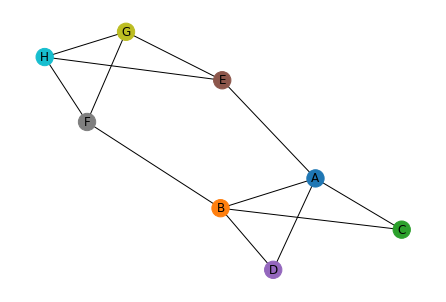

In [13]:
# Testez la cellule ci-dessous. Grâce à l'implémentation réalisée
# il est possible de colorer un sommet grâce à un nombre.
# Cela permettra de mettre en oeuvre l'algorithme de la question précédente.

A.colorer("A",1)
A.colorer("B",2)
A.colorer("C",3)
A.colorer("D",4)
A.colorer("E",5)
A.colorer("F",6)
A.colorer("G",7)
A.colorer("H",8)
print(A)



<div class="alert alert-warning" role="alert">
    
## Exercice 5
Complétez les 2 fonctions suivantes.
    
La première fonction prendra en paramètre une liste de voisins et un dictionnaire de couleurs.  
Dans ce dictionnaire, les clés seront les sommets du graphe et les valeurs seront les couleurs.  
Les couleurs seront représentées par des nombres entiers.  
Cette fonction doit renvoyer la plus petite couleur non utilisée par les voisins
    
La seconde fonction prend en paramètre un graphe et doit renvoyer le coloriage de ce graphe.  
Ce coloriage sera la donnée d'un dictionnaire associant les sommets à leurs couleurs
    
</div>

In [27]:
def ppcnu(voisins : list,couleurs : dict):
    """
    retourne la plus petite couleur (nombre entier) non utilisée par les voisins
    on examine les couleurs des voisins (si elle existe) et on choisit le plus petit entier 
    """
    n = len(voisins) 
    disponible = [True] * (n+1)
    for v in voisins : 
        if v in couleurs and couleurs[v] <= n: 
            disponible[couleurs[v]]=False
    for c in range(n+1):
        if disponible[c] == True:
            return c

In [28]:
# Tests de la fonction ppcnu
couleurstest = {"A":0 , "B":1, "C":1 , "D":2}

assert ppcnu(["A","B","C","D"],couleurstest) == 3
assert ppcnu(["B","C","D"],couleurstest) == 0
assert ppcnu(["A","D"],couleurstest) == 1

In [29]:
def coloriage(g):
    "Retourne le coloriage et le nombre de couleur necessaire pour colorer un graphe"
    couleurs = {}
    nb_couleurs = 0
    for s in g.sommets():
        c = ppcnu(g.voisins(s),couleurs)
        couleurs[s]=c
        g.colorer(s,c)
        nb_couleurs = max(nb_couleurs,c+1)
    return couleurs,nb_couleurs

{'A': 0, 'B': 1, 'C': 2, 'D': 3}



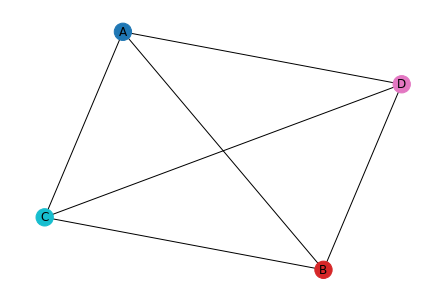

In [30]:
# Test de la fonction coloriage

dic_couleurs,n = coloriage(gr)
print(gr)

{'A': ['Acc', 'B', 'Bou', 'C'], 'Acc': ['A', 'C', 'G'], 'B': ['A', 'D', 'E', 'F'], 'Bou': ['A'], 'C': ['A', 'Acc', 'D', 'G'], 'G': ['Acc', 'C', 'D', 'H'], 'D': ['B', 'C', 'E', 'G'], 'E': ['B', 'D', 'F', 'H'], 'F': ['B', 'E'], 'H': ['E', 'G']}
{'A': 0, 'Acc': 1, 'B': 1, 'Bou': 1, 'C': 2, 'G': 0, 'D': 3, 'E': 0, 'F': 2, 'H': 1}



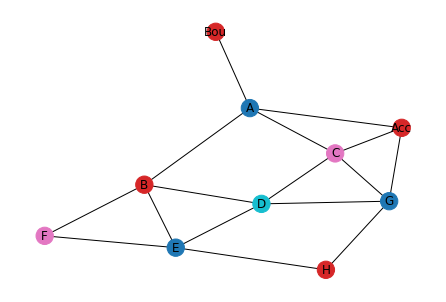

In [33]:
M=Graphe()

M.ajouter_arete("A","Acc")
M.ajouter_arete("A","B")
M.ajouter_arete("A","Bou")
M.ajouter_arete("A","C")
M.ajouter_arete("Acc","C")
M.ajouter_arete("Acc","G")
M.ajouter_arete("B","D")
M.ajouter_arete("B","E")
M.ajouter_arete("B","F")

M.ajouter_arete("C","D")
M.ajouter_arete("C","G")
M.ajouter_arete("D","E")
M.ajouter_arete("D","G")
M.ajouter_arete("E","F")
M.ajouter_arete("E","H")
M.ajouter_arete("H","G")

print(M.adj)
coloriage(M)
print(M)


{'A': 0, 'B': 1, 'C': 2, 'D': 2, 'E': 1, 'F': 0, 'G': 2, 'H': 3}



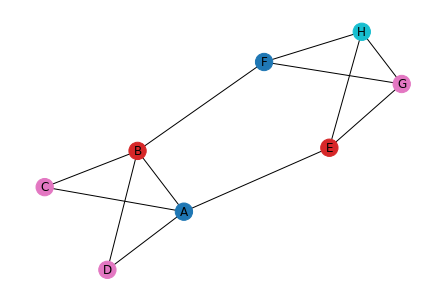

In [34]:
coloriage(A)
print(A)

Voici un extrait d'un sujet de BAC (Term ES) de 2007.

Répondre aux différentes questions 

![BAC1](https://nc-lycees.netocentre.fr/s/dekKrNAF3Px4DdX/preview)

In [13]:
# Question 1





In [14]:
# Question 2 a et b



In [15]:
# Question 3




In [16]:
# Note : on peut faire mieux que 4 couleurs, en effet en changeant 
# l'ordre des sommets du graphe le résultat de la coloration peut varier.
